# Multiwavelength astronomy: Follow-up of discussions

Follow-up from discussions during the [2025 Australia/eROSITA-DE multi-wavelength school](https://astronomyaustralia.org.au/event/2025-australia-erosita-de-multi-wavelength-school/).

Author: Sven Buder (ANU, sven.buder@anu.edu.au)

In [1]:
# Read in python packages
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import matplotlib.pyplot as plt

## 1 A way to compare with the "history" of measurements?

Mara Salvato said that several survey catalogues include wrong measurements -- although we know better.
A solution for this problem would be to check past measurements automatically and flag those that differ significantly for the necessary manual follow-up.  

Where can we get these past measurements from? The [SIMBAD Service](https://simbad.cds.unistra.fr/) at the CDS is actually already providing such a service and one would only need to figure out how to efficiently use it.  

In [2]:
# Use the python interface for SIMBAD
from astroquery.simbad import Simbad

## 1.1 What information can we query from Simbad?

Have a look here: https://cds.unistra.fr/help/documentation/simbad-more/adql-simbad/

![Simbad Tables](https://simbad.u-strasbg.fr/simbad/images/tables.png)

## 1.2 How to set up a query for a specific object

In [3]:
from astroquery.simbad import Simbad

object_list = ['JADES-GN NS 3991', '[SWM2014] GOODS-N 5984']  # Add more names here

query_template = """
SELECT DISTINCT *
FROM ident
JOIN mesVelocities USING(oidref)
WHERE id = '{}'
"""

object_search_results = {}

for obj in object_list:
    query = query_template.format(obj)
    try:
        redshift_table = Simbad.query_tap(query)
        object_search_results[obj] = redshift_table
    except Exception as e:
        print(f"Query failed for {obj}: {e}")
        object_search_results[obj] = None

In [4]:
object_search_results[object_list[0]]

oidref,id,bibcode,d,meanError,meanError_prec,nature,nbmes,obsdate,obsdate_prec,origin,qual,quality,remark,remarks,resolution,velType,velValue,velValue_prec,wdomain,mespos
int64,object,object,str1,float32,int16,object,int16,float64,int16,object,str1,str1,str1,object,int32,object,float64,int16,object,int16
6231699,JADES-GN NS 3991,2014ApJS..214...24S,,--,--,p,--,--,--,,,,,,--,z,2.4829,4,,5
6231699,JADES-GN NS 3991,2015ApJ...803...34B,,--,--,p,--,--,--,,,,,,--,z,10.2,2,NIR,6
6231699,JADES-GN NS 3991,2018ApJS..237...12O,,--,32767,p,--,--,32767,,,,,,--,z,2.489,3,,2
6231699,JADES-GN NS 3991,2022ApJ...928...52F,,--,--,p,--,--,32767,,,,,,--,z,10.41,2,Opt,3
6231699,JADES-GN NS 3991,2022ApJ...930..104L,",",--,--,p,--,--,32767,,,,,,--,z,10.41,2,,4
6231699,JADES-GN NS 3991,2025ApJ...980..225T,,--,32767,s,--,--,32767,,C,,,,--,z,10.621,3,NIR,1


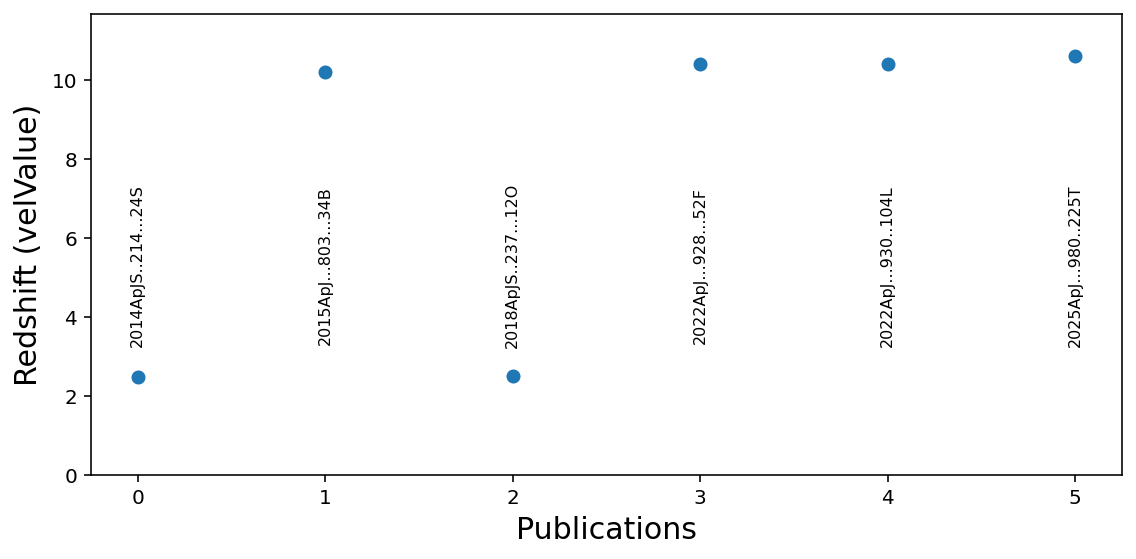

In [5]:
f, ax = plt.subplots(figsize=(8,4))

x_labels = object_search_results[object_list[0]]['bibcode']
x_data = list(range(len(x_labels)))
y_data = object_search_results[object_list[0]]['velValue']

plt.scatter(x_data, y_data)

get_z_max = max(y_data)
ax.set_ylim(0,1.1*get_z_max)

for index, label in enumerate(x_labels):
    ax.text(index,0.5*get_z_max,label,rotation=90,va='center',ha='center',fontsize=8)

ax.set_xlabel("Publications",fontsize=15)
ax.set_ylabel("Redshift (velValue)",fontsize=15)
plt.tight_layout()

In [6]:
object_search_results[object_list[1]]

oidref,id,bibcode,d,meanError,meanError_prec,nature,nbmes,obsdate,obsdate_prec,origin,qual,quality,remark,remarks,resolution,velType,velValue,velValue_prec,wdomain,mespos
int64,object,object,str1,float32,int16,object,int16,float64,int16,object,str1,str1,str1,object,int32,object,float64,int16,object,int16
11731849,[SWM2014] GOODS-N 5984,2014ApJS..214...24S,,--,--,p,--,--,--,,,,,,--,z,0.6331,4,,3
11731849,[SWM2014] GOODS-N 5984,2015ApJ...803...34B,,--,--,p,--,--,--,,,,,,--,z,4.48,2,NIR,4
11731849,[SWM2014] GOODS-N 5984,2018ApJS..237...12O,,--,32767,p,--,--,32767,,,,,,--,z,0.622,3,,1
11731849,[SWM2014] GOODS-N 5984,2018MNRAS.478.3740A,,0.07,2,p,--,--,32767,,,E,,,--,z,4.65,2,,2


## 1.3 How to set up a query for a specific sky position

In [7]:
from astroquery.simbad import Simbad

targets = [
    {'name': 'JADES-GN NS 3991', 'ra': (12+36/60.+25.46/3600.)*15., 'dec': (62+14/60.+31.4/3600.)},
    {'name': '[SWM2014] GOODS-N 5984', 'ra': (12+37/60.+9.08/3600.)*15., 'dec': (62+10/60.+11.5/3600.)},
]

radius_arcsec = 2.0
coordinate_search_results = {}

for target in targets:
    ra = target['ra']
    dec = target['dec']
    query = f"""
    SELECT DISTINCT basic.main_id, basic.ra, basic.dec, mesVelocities.*
    FROM basic
    JOIN mesVelocities ON basic.oid = mesVelocities.oidref
    WHERE 1=CONTAINS(
      POINT('ICRS', basic.ra, basic.dec),
      CIRCLE('ICRS', {ra}, {dec}, {radius_arcsec / 3600.0})
    )
    """
    try:
        query_result = Simbad.query_tap(query)
        coordinate_search_results[target['name']] = query_result
    except Exception as e:
        print(f"Query failed for {target['name']}: {e}")
        coordinate_search_results[target['name']] = None

In [8]:
coordinate_search_results[targets[0]['name']]

main_id,ra,dec,bibcode,d,meanError,meanError_prec,nature,nbmes,obsdate,obsdate_prec,origin,qual,quality,remark,remarks,resolution,velType,velValue,velValue_prec,wdomain,oidref,mespos
,deg,deg,,,,,,,,,,,,,,,,,,,,
object,float64,float64,object,str1,float32,int16,object,int16,float64,int16,object,str1,str1,str1,object,int32,object,float64,int16,object,int64,int16
JADES-GN NS 3991,189.10608333333332,62.24205555555555,2014ApJS..214...24S,,--,--,p,--,--,--,,,,,,--,z,2.4829,4,,6231699,5
JADES-GN NS 3991,189.10608333333332,62.24205555555555,2015ApJ...803...34B,,--,--,p,--,--,--,,,,,,--,z,10.2,2,NIR,6231699,6
JADES-GN NS 3991,189.10608333333332,62.24205555555555,2018ApJS..237...12O,,--,32767,p,--,--,32767,,,,,,--,z,2.489,3,,6231699,2
JADES-GN NS 3991,189.10608333333332,62.24205555555555,2022ApJ...928...52F,,--,--,p,--,--,32767,,,,,,--,z,10.41,2,Opt,6231699,3
JADES-GN NS 3991,189.10608333333332,62.24205555555555,2022ApJ...930..104L,",",--,--,p,--,--,32767,,,,,,--,z,10.41,2,,6231699,4
JADES-GN NS 3991,189.10608333333332,62.24205555555555,2025ApJ...980..225T,,--,32767,s,--,--,32767,,C,,,,--,z,10.621,3,NIR,6231699,1
MODS deep 1115,189.1065869,62.2422405,2011PASJ...63S.379K,,--,--,p,--,--,--,,,,,,--,z,0.54,3,,8539994,5
MODS deep 1115,189.1065869,62.2422405,2011PASJ...63S.379K,,--,--,p,--,--,--,,,,,,--,z,2.268,3,,8539994,3


In [9]:
coordinate_search_results[targets[1]['name']]

main_id,ra,dec,bibcode,d,meanError,meanError_prec,nature,nbmes,obsdate,obsdate_prec,origin,qual,quality,remark,remarks,resolution,velType,velValue,velValue_prec,wdomain,oidref,mespos
,deg,deg,,,,,,,,,,,,,,,,,,,,
object,float64,float64,object,str1,float32,int16,object,int16,float64,int16,object,str1,str1,str1,object,int32,object,float64,int16,object,int64,int16
[ARM2018] SHARDS20012347,189.28783333333334,62.16986111111111,2014ApJS..214...24S,,--,--,p,--,--,--,,,,,,--,z,0.6331,4,,11731849,3
[ARM2018] SHARDS20012347,189.28783333333334,62.16986111111111,2015ApJ...803...34B,,--,--,p,--,--,--,,,,,,--,z,4.48,2,NIR,11731849,4
[ARM2018] SHARDS20012347,189.28783333333334,62.16986111111111,2018ApJS..237...12O,,--,32767,p,--,--,32767,,,,,,--,z,0.622,3,,11731849,1
[ARM2018] SHARDS20012347,189.28783333333334,62.16986111111111,2018MNRAS.478.3740A,,0.07,2,p,--,--,32767,,,E,,,--,z,4.65,2,,11731849,2
